In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from adjustText import adjust_text
# from __future__ import division

%matplotlib inline
seaborn.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
G:\Anaconda3\lib\site

In [2]:
# 政策数据导入
f_policy = open(r'OxCGRT_latest.csv',encoding="utf-8")
data_policy = pd.read_csv(f_policy)

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 对政策指标的二值化更改
# 封闭措施
# C1
data_policy['C1'] = 0
data_policy['C1'][data_policy['C1_School closing']<=1.0] = 0
data_policy['C1'][data_policy['C1_School closing']>=2.0] = 1
# C2
data_policy['C2'] = 0
data_policy['C2'][data_policy['C2_Workplace closing']<=1.0] = 0
data_policy['C2'][data_policy['C2_Workplace closing']>=2.0] = 1
# C3
data_policy['C3'] = 0
data_policy['C3'][data_policy['C3_Cancel public events']>=1.0] = 1
# C4
data_policy['C4'] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']<=3.0] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']>=4.0] = 1
# C5
data_policy['C5'] = 0
data_policy['C5'][data_policy['C5_Close public transport']<=1.0] = 0
data_policy['C5'][data_policy['C5_Close public transport']>=2.0] = 1
# C6
data_policy['C6'] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']<=1.0] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']>=2.0] = 1
# C7
data_policy['C7'] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']<=1.0] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']>=2.0] = 1
# C8
data_policy['C8'] = 0
data_policy['C8'][data_policy['C8_International travel controls']<=1.0] = 0
data_policy['C8'][data_policy['C8_International travel controls']>=2.0] = 1

# 经济政策
# E1
data_policy['E1'] = 0
data_policy['E1'][data_policy['E1_Income support']>=1.0] = 1
# E2
data_policy['E2'] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']<=1.0] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']>=2.0] = 1
# E3
data_policy['E3'] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']<1e+07] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']>=1e+07] = 1
# E4
data_policy['E4'] = 0
data_policy['E4'][data_policy['E4_International support']<1e+05] = 0
data_policy['E4'][data_policy['E4_International support']>=1e+05] = 1

# 卫生系统政策
# H1
data_policy['H1'] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']<=1.0] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']>=2.0] = 1
# H2
data_policy['H2'] = 0
data_policy['H2'][data_policy['H2_Testing policy']<=1.0] = 0
data_policy['H2'][data_policy['H2_Testing policy']>=2.0] = 1
# H3
data_policy['H3'] = 0
data_policy['H3'][data_policy['H3_Contact tracing']<=1.0] = 0
data_policy['H3'][data_policy['H3_Contact tracing']>=2.0] = 1
# H4
data_policy['H4'] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']<1e+06] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']>=1e+06] = 1
# H5
data_policy['H5'] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']<1e+06] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']>=1e+06] = 1
# H6
data_policy['H6'] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']<=2.0] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']>=3.0] = 1
# H7
data_policy['H7'] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']<=3.0] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']>=4.0] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\zay\AppD

In [4]:
# 取国家水平的政策数据、筛选时间
data_policy = data_policy[data_policy['Jurisdiction'] == 'NAT_TOTAL']
data_policy['Date'] = pd.to_datetime(data_policy['Date'],format='%Y%m%d')
data_policy = data_policy[data_policy['Date']<='2020-12-31']

In [5]:
# 建立字典，对应政策代号及其中英文名
dic_policyEng = dict()
dic_policyChi = dict()

# 封闭措施
dic_policyEng['C1'] = 'School closing'
dic_policyChi['C1'] = '关闭学校'
dic_policyEng['C2'] = 'Workplace closing'
dic_policyChi['C2'] = '关闭工作场所'
dic_policyEng['C3'] = 'Cancel public events'
dic_policyChi['C3'] = '取消公共活动'
dic_policyEng['C4'] = 'Restrictions on gatherings'
dic_policyChi['C4'] = '限制集会'
dic_policyEng['C5'] = 'Close public transport'
dic_policyChi['C5'] = '关闭公共交通'
dic_policyEng['C6'] = 'Stay at home requirements'
dic_policyChi['C6'] = '居家要求'
dic_policyEng['C7'] = 'Restrictions on internal movement'
dic_policyChi['C7'] = '国内移动限制'
dic_policyEng['C8'] = 'International travel controls'
dic_policyChi['C8'] = '国际旅行控制'

# 经济政策
dic_policyEng['E1'] = 'Income support'
dic_policyChi['E1'] = '收入支持'
dic_policyEng['E2'] = 'Debt/contract relief'
dic_policyChi['E2'] = '债务/合同放宽'
dic_policyEng['E3'] = 'Fiscal measures'
dic_policyChi['E3'] = '财政措施'
dic_policyEng['E4'] = 'International support'
dic_policyChi['E4'] = '给予国际支持'

# 卫生系统政策
dic_policyEng['H1'] = 'Public information campaigns'
dic_policyChi['H1'] = '公共信息宣传'
dic_policyEng['H2'] = 'Testing policy'
dic_policyChi['H2'] = '检测政策'
dic_policyEng['H3'] = 'Contact tracing'
dic_policyChi['H3'] = '接触者追踪'
dic_policyEng['H4'] = 'Emergency investment in healthcare'
dic_policyChi['H4'] = '医疗保健紧急投资'
dic_policyEng['H5'] = 'Investment in vaccines'
dic_policyChi['H5'] = '疫苗投资'
dic_policyEng['H6'] = 'Facial Coverings'
dic_policyChi['H6'] = '口罩政策'
dic_policyEng['H7'] = 'Vaccination Policy'
dic_policyChi['H7'] = '疫苗接种政策'

In [6]:
# 政策编号列表
ls_code = (dic_policyEng.keys())

In [7]:
# 是否存在政策
data_policy['policyExists'] = 0
data_policy['C'] = 0
data_policy['E'] = 0
data_policy['H'] = 0
for code in ls_code:
    data_policy['policyExists'] = data_policy['policyExists'] + data_policy[code]
    if code[0] == 'C':
        data_policy['C'] = data_policy['C'] + data_policy[code]
    elif code[0] == 'E':
        data_policy['E'] = data_policy['E'] + data_policy[code]
    elif code[0] == 'H':
        data_policy['H'] = data_policy['H'] + data_policy[code]

data_policy['policyExists'][data_policy['policyExists']>0] = 1
data_policy['C'][data_policy['C']>=1] = 1
data_policy['E'][data_policy['E']>=1] = 1
data_policy['H'][data_policy['H']>=1] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [8]:
period = list(pd.period_range('2020-01-01','2020-12-31',freq='D'))
for i in range(len(period)):
    period[i] = str(period[i])
    period[i] = pd.to_datetime(period[i])

In [9]:
data_policyCountries = pd.DataFrame()

In [10]:
for day in period:
    subdata = data_policy[data_policy['Date']==day]
    C = subdata['C'].sum()
    H = subdata['H'].sum()
    # print(C,H)
    subdata_policyCountries = pd.DataFrame([[day,C,H]],columns=['Date','C','H'])
    data_policyCountries = data_policyCountries.append(subdata_policyCountries)
data_policyCountries

,Date,C,H
0,2020-01-01,1,4
0,2020-01-02,1,5
0,2020-01-03,1,5
0,2020-01-04,1,5
0,2020-01-05,1,6
...,...,...,...
0,2020-12-27,178,177
0,2020-12-28,178,177
0,2020-12-29,178,177
0,2020-12-30,178,177


In [11]:
data_policyCountries[(data_policyCountries['Date']<=pd.to_datetime('2020-03-15'))&(data_policyCountries['Date']>=pd.to_datetime('2020-03-10'))]

,Date,C,H
0,2020-03-10,109,126
0,2020-03-11,117,126
0,2020-03-12,130,131
0,2020-03-13,141,137
0,2020-03-14,147,141
0,2020-03-15,153,142


Text(0.5, 1.0, '采用C类政策和H类政策的国家（或地区）数量变化情况')

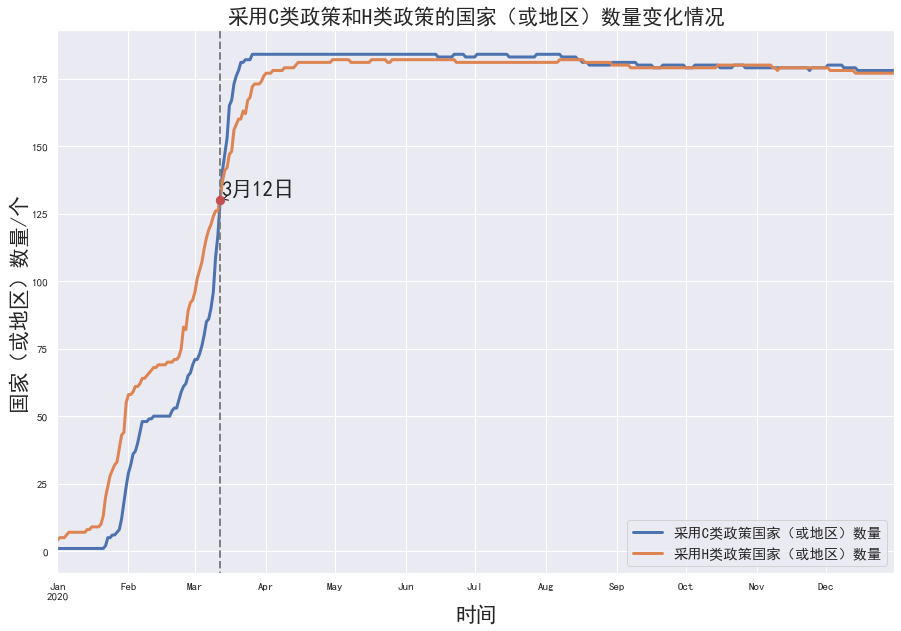

In [12]:
data_policyCountries.index = data_policyCountries['Date']
plt.figure(figsize=(15,10))

texts = []
data_policyCountries['C'].plot(linewidth=3)
data_policyCountries['H'].plot(linewidth=3)
plt.scatter(pd.to_datetime('2020-03-12'),130,s=70,c='r',zorder=20)
texts.append(plt.text(pd.to_datetime('2020-03-12'),130,'3月12日',fontsize='xx-large',horizontalalignment='right'))
plt.legend(['采用C类政策国家（或地区）数量','采用H类政策国家（或地区）数量'],fontsize='large')
plt.axvline(pd.to_datetime('2020-03-12'), -10, 180,color="grey",ls="--",lw=2)

adjust_text(texts,arrowprops=dict(arrowstyle='->',lw= 1,color='black'))
plt.xlabel('时间',fontsize='xx-large')
plt.ylabel('国家（或地区）数量/个',fontsize='xx-large')
plt.title('采用C类政策和H类政策的国家（或地区）数量变化情况',fontsize='xx-large')